In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
from mriqc_learn.datasets import load_dataset
from mriqc_learn.viz import metrics
from mriqc_learn.models.preprocess import SiteRobustScaler

# Load some example data

In [2]:
(train_x, train_y), (_, _) = load_dataset(split_strategy="none")
train_x["site"] = train_y.site
ratings = np.array(["Exclude"] * len(train_x))

ratings[train_y.rater_3.values == 0] = "Doubtful"
ratings[train_y.rater_3.values == 1] = "Accept"

In [3]:
(test_x, test_y), (_, _) = load_dataset("ds030", split_strategy="none")
test_x["site"] = test_y.site
ratings_test = np.array(["Exclude"] * len(test_x))

ratings_test[test_y.rater_1.values == 0] = "Doubtful"
ratings_test[test_y.rater_1.values == 1] = "Accept"

In [4]:
merged_x = pd.concat((train_x, test_x))

findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


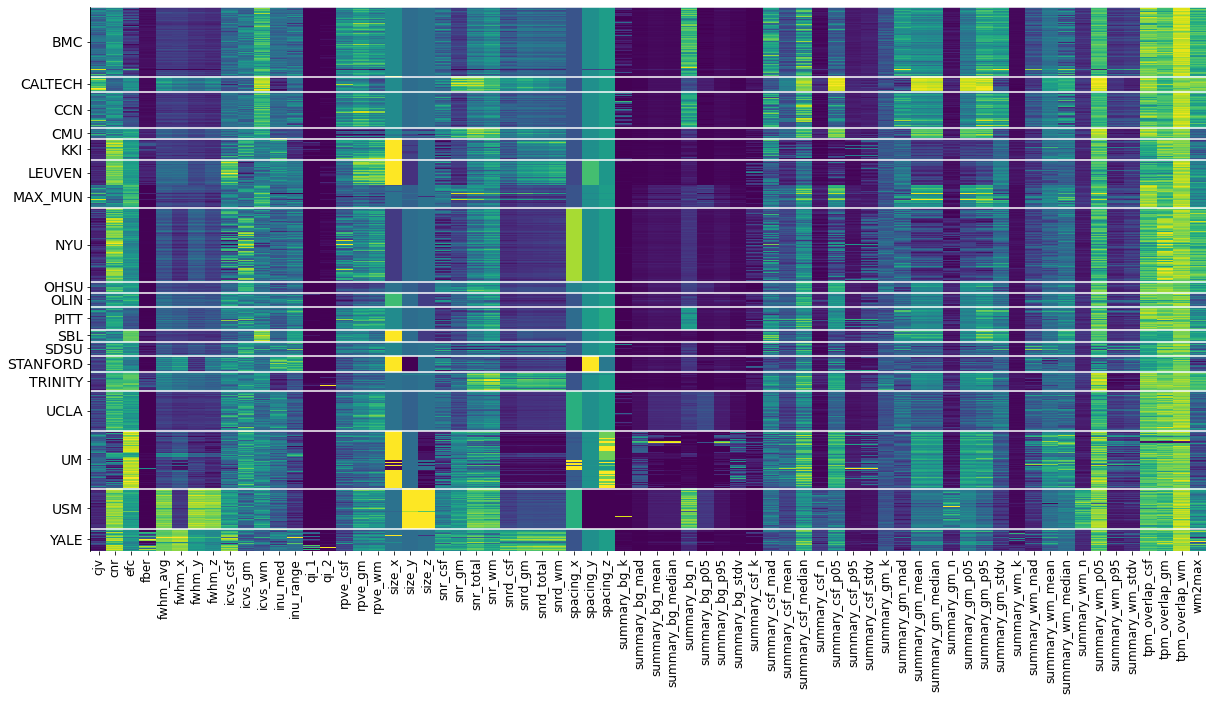

In [5]:
metrics.plot_batches(merged_x);

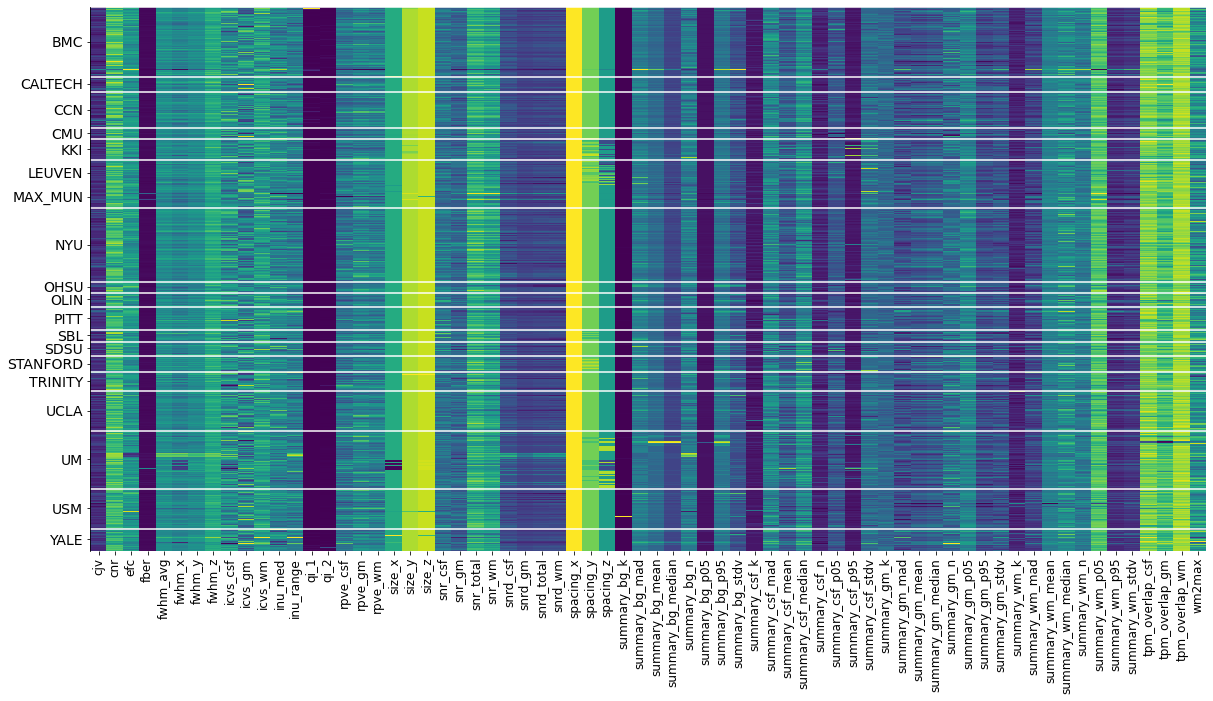

In [6]:
scaled_x = SiteRobustScaler(unit_variance=True).fit_transform(merged_x)
fig2 = metrics.plot_batches(scaled_x)

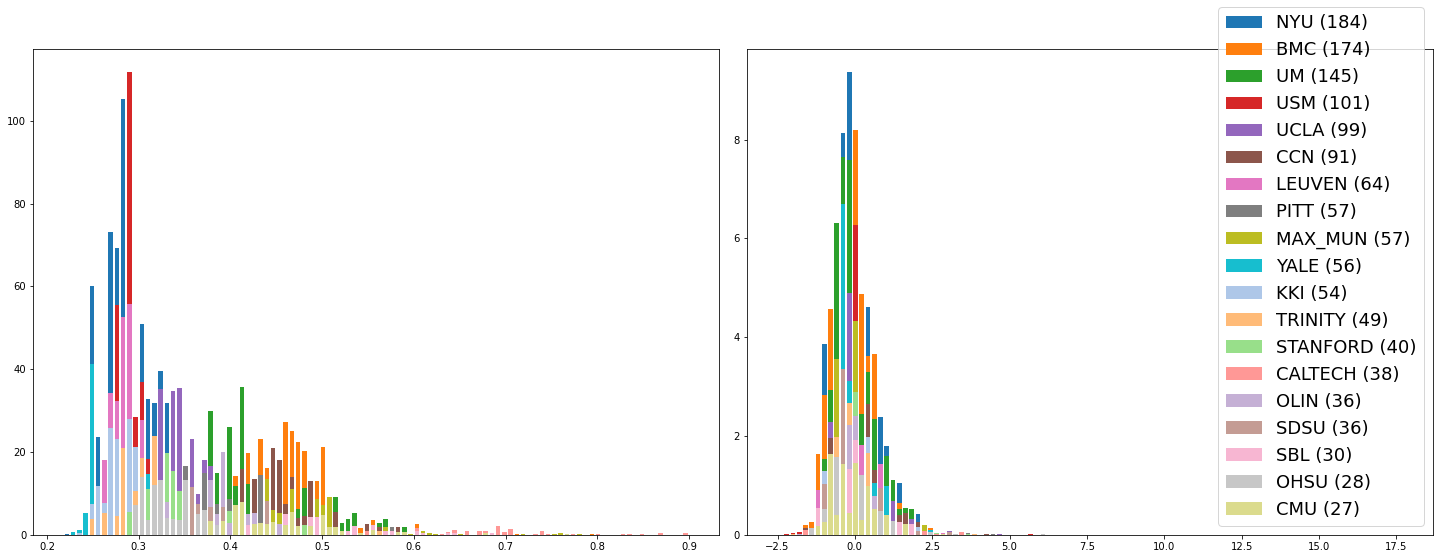

In [7]:
metrics.plot_histogram(merged_x, scaled_x, metric="cjv");

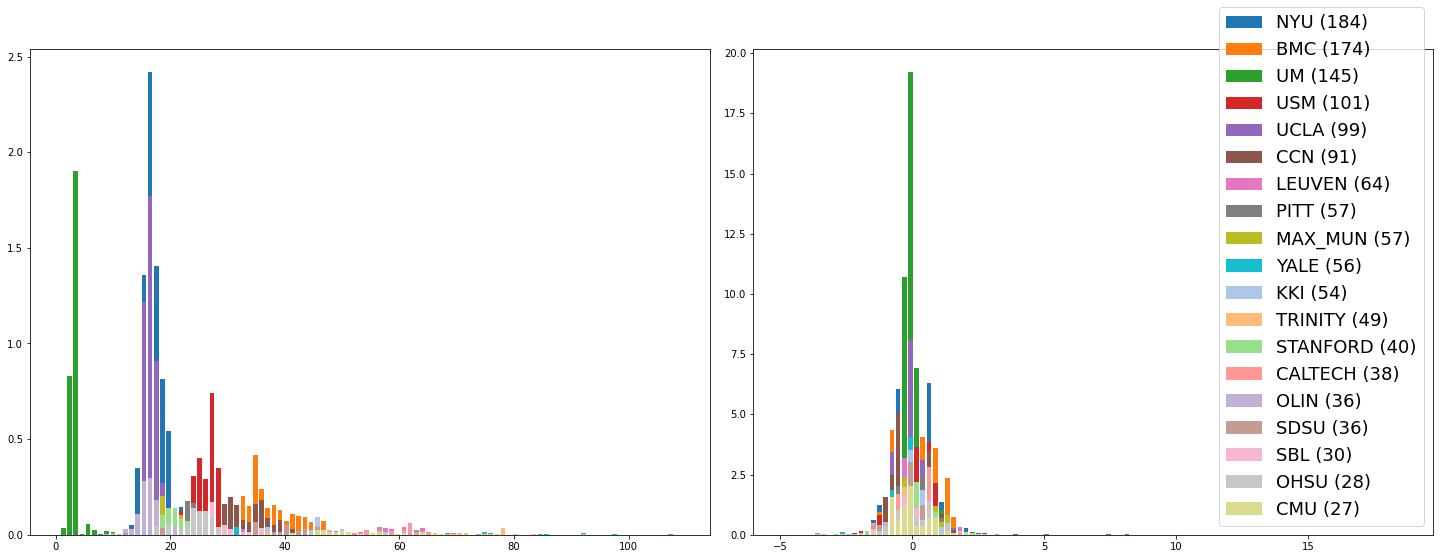

In [8]:
metrics.plot_histogram(merged_x, scaled_x);

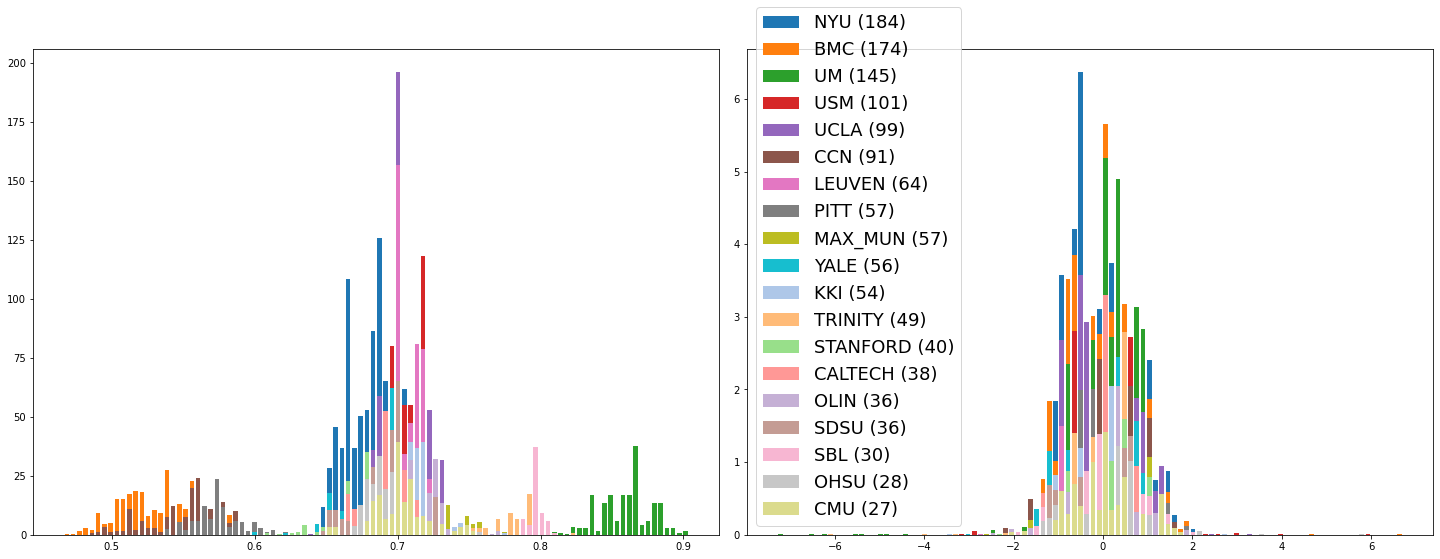

In [9]:
metrics.plot_histogram(merged_x, scaled_x, metric="efc");

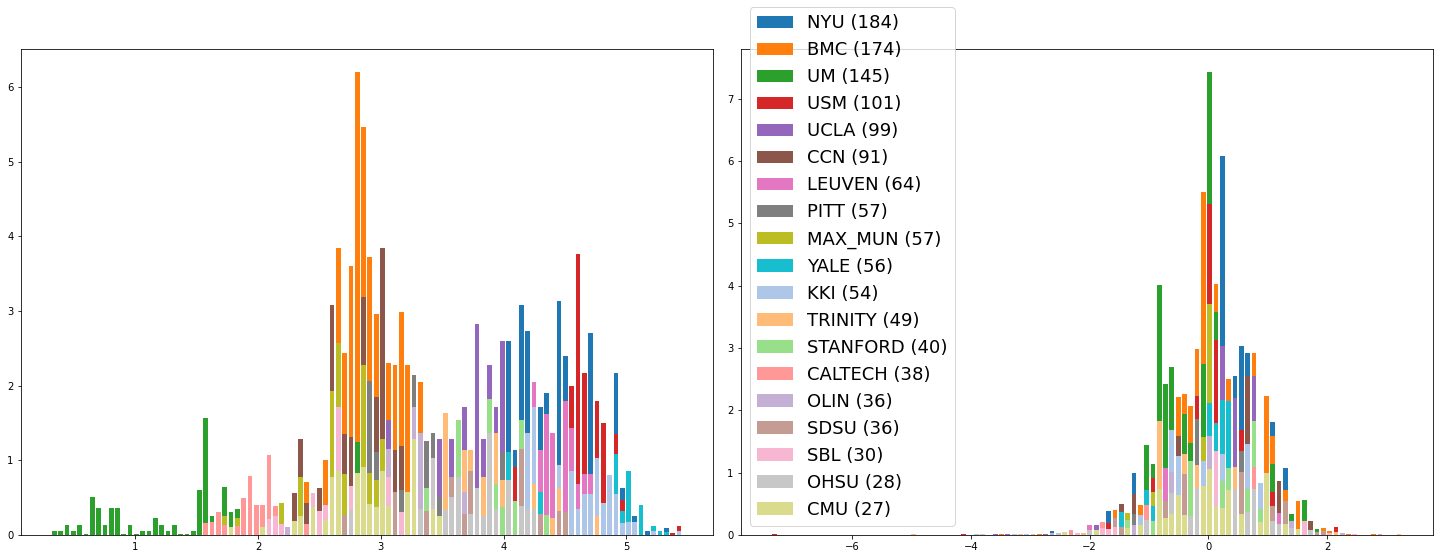

In [10]:
metrics.plot_histogram(merged_x, scaled_x, metric="cnr");

In [12]:
from mriqc_learn.viz import ratings

In [17]:
train_y

,subject_id,site,rater_1,rater_2,rater_3
0,50002,PITT,NaN,1.0,1
1,50003,PITT,-1.0,NaN,1
2,50004,PITT,NaN,1.0,1
3,50005,PITT,NaN,1.0,1
4,50006,PITT,0.0,1.0,1
...,...,...,...,...,...
1096,51583,SBL,NaN,0.0,1
1097,51584,SBL,-1.0,NaN,1
1098,51585,SBL,NaN,0.0,1
1099,51606,MAX_MUN,0.0,NaN,1


In [16]:
ratings.raters_variability_plot(train_y)

/Users/oesteban/workspace/mriqc-learn/mriqc_learn/viz/ratings.py:38: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  raters = sorted(dataframe.columns.ravel().tolist())


LatexError: LaTeX returned an error, probably missing font or error in preamble.
This is XeTeX, Version 3.14159265-2.6-0.99992 (TeX Live 2015) (preloaded format=xelatex)
 restricted \write18 enabled.
**entering extended mode
LaTeX2e <2016/02/01>
Babel <3.9n> and hyphenation patterns for 79 languages loaded.

*
*(/usr/local/texlive/2015/texmf-dist/tex/latex/base/minimal.cls
Document Class: minimal 2001/05/25 Standard LaTeX minimal class
)
*! Undefined control sequence.
\\  ->\let \reserved@e 
                       \relax \let \reserved@f \relax \@ifstar {\let \reserv...
<*> ...ldItalicFont=HelveticaLTStd-BoldObl,\n    ]
                                                  \n    \\setmainfont{Helvet...
No pages of output.
Transcript written on texput.log.


<Figure size 1584x1584 with 18 Axes>

LatexError: LaTeX returned an error, probably missing font or error in preamble.
This is XeTeX, Version 3.14159265-2.6-0.99992 (TeX Live 2015) (preloaded format=xelatex)
 restricted \write18 enabled.
**entering extended mode
LaTeX2e <2016/02/01>
Babel <3.9n> and hyphenation patterns for 79 languages loaded.

*
*(/usr/local/texlive/2015/texmf-dist/tex/latex/base/minimal.cls
Document Class: minimal 2001/05/25 Standard LaTeX minimal class
)
*! Undefined control sequence.
\\  ->\let \reserved@e 
                       \relax \let \reserved@f \relax \@ifstar {\let \reserv...
<*> ...ldItalicFont=HelveticaLTStd-BoldObl,\n    ]
                                                  \n    \\setmainfont{Helvet...
No pages of output.
Transcript written on texput.log.


<Figure size 1584x1584 with 18 Axes>